In [7]:
         # Project 2:  Prediction model

In [8]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, mean_squared_error


In [9]:
wine = pd.read_csv('C:\\Users\\n\\Downloads\\archive (6)\\wine.csv')

In [10]:
#Visualization
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [11]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,good


In [12]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [13]:
# Check for missing values
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Explore the data using EDA techniques and plot visualizations

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# wine = pd.read_csv('winequality-red.csv', delimiter=';')
wine = pd.read_csv('C:\\Users\\n\\Downloads\\archive (6)\\wine.csv',delimiter=';')


In [15]:
# Display the column names
print(wine.columns)


Index(['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality'], dtype='object')


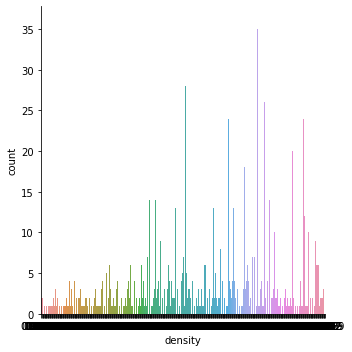

In [16]:
# number of values for each quality
wine = pd.read_csv('C:\\Users\\n\\Downloads\\archive (6)\\wine.csv')
sns.catplot(x='density', data = wine, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='Count'>

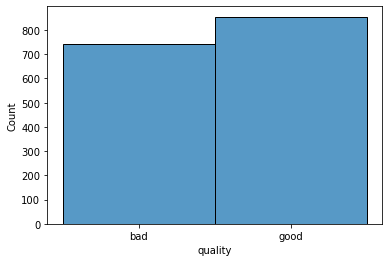

In [17]:
# # Plot a histogram of the quality column
sns.histplot(wine['quality'], bins=6)

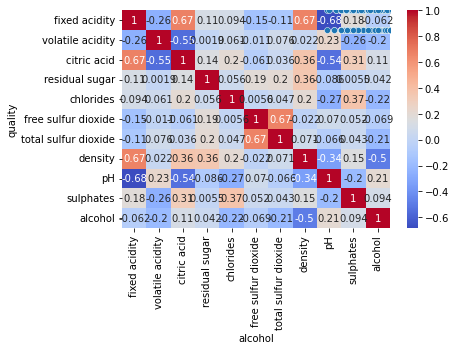

In [18]:

# Plot a heatmap of the correlation matrix
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

# Plot a scatterplot of alcohol vs. quality
sns.scatterplot(x='alcohol', y='quality', data=wine)

# Show the plots
plt.show()


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

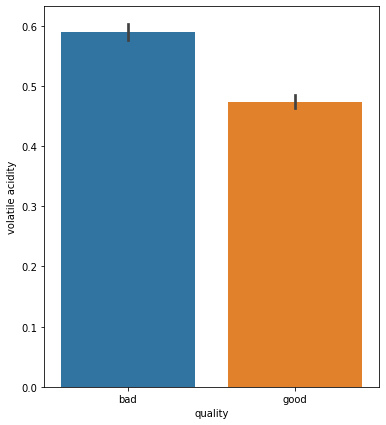

In [19]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(6,7))
sns.barplot(x='quality', y = 'volatile acidity', data = wine)

In [20]:
#Exploration  and preparation for model training
  # checking for missing values
wine.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

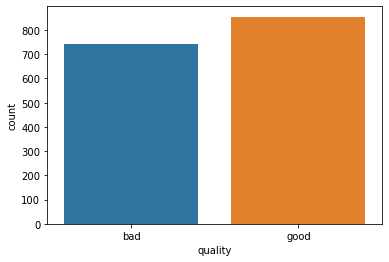

In [21]:
# The distribution of our target variable, 'quality'
sns.countplot(x='quality', data=wine)

In [22]:
#Split it into training and testing sets
X = wine.drop('quality', axis=1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
#Train logistic regression and decision tree models
   #logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(lr_pred)


['bad' 'bad' 'good' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good'
 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'bad'
 'good' 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'good'
 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'good' 'bad'
 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'goo

C:\Users\n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
   #Decision tree
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)
params = {'max_depth': [3, 5, 7, 10, None], 'min_samples_leaf': [1, 2, 5, 10, 15], 'criterion': ['gini', 'entropy']}
dt_grid = GridSearchCV(dt, param_grid=params, cv=5)
dt_grid.fit(X_train, y_train)
dt_pred = dt_grid.predict(X_test)


In [33]:

#Prints the Prediction
print(dt_pred)

['bad' 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good'
 'bad' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'bad' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good'
 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'good'
 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good'
 'bad' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'good'
 'bad' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'good' 

In [26]:
# Evaluation of performance using various metrics such as the confusion matrix, 
# classification report, and ROC score. 
# For the logistic regression model
print(confusion_matrix(y_test, lr_pred))


[[103  38]
 [ 46 133]]


In [27]:
print(classification_report(y_test, lr_pred))
# print('ROC score:', roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr'))
# print('ROC score:', roc_auc_score(y_test[:, 1], dt_grid.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

         bad       0.69      0.73      0.71       141
        good       0.78      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.73      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [28]:
# For the decision tree model
#Confusion matrix
print(confusion_matrix(y_test, dt_pred))


[[103  38]
 [ 59 120]]


In [34]:
from sklearn.metrics import classification_report, roc_auc_score
dt_pred = dt_grid.predict(X_test)
print(classification_report(y_test, dt_pred))


C:\Users\n\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         bad       0.44      1.00      0.61       141
        good       0.00      0.00      0.00       179

    accuracy                           0.44       320
   macro avg       0.22      0.50      0.31       320
weighted avg       0.19      0.44      0.27       320



C:\Users\n\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\n\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\n\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,confusion_matrix,accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=MinMaxScaler(feature_range=(0,1))
print(scaler)


MinMaxScaler()


In [36]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [37]:
print(lr.score(X_train,y_train))

0.47146207974980453


C:\Users\n\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
     #THE END